# BUSINESS CONCERN: SPREAD OF CORONA VIRUS AND CHECK IF IT IS VERY DANGEROUS AND IF IT EXPLAINS ALL THE PANIC IN THE POPULATION


In [1]:
# DAILY REPORTS ABOUT CONFIRMED, DEATHS AND RECOVERY CASES DOWNLOADED FROM JOHN HOPKINS UNIVERSITY

url_file_conf = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_file_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
url_file_recov = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"


In [10]:
# import libraries
import numpy as np              # used for algebraic operations      
import pandas as pd              # used for data manipulation and data analysis
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns           # used for visualisations

In [23]:

INDEX = "Country/Region"

# load confirmed cases data
data_conf = pd.read_csv( url_file_conf, index_col = INDEX )

# load deaths data
data_deaths = pd.read_csv( url_file_deaths, index_col = INDEX )

# Load recover data
data_deaths = pd.read_csv( url_file_recov, index_col = INDEX )


In [24]:
# EXPLORE YOUR DATA
# WHAT IS THERE?????

data_conf

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,31.8257,117.2264,1,9,15,39,60,70,106,...,990,990,990,990,990,990,990,990,990,990
Mainland China,Beijing,40.1824,116.4142,14,22,36,41,68,80,91,...,411,413,414,414,418,418,422,426,428,428
Mainland China,Chongqing,30.0572,107.8740,6,9,27,57,75,110,132,...,576,576,576,576,576,576,576,576,576,576
Mainland China,Fujian,26.0789,117.9874,1,5,10,18,35,59,80,...,296,296,296,296,296,296,296,296,296,296
Mainland China,Gansu,36.0611,103.8343,0,2,2,4,7,14,19,...,91,91,91,91,91,102,119,120,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US,"Collin County, TX",33.1795,-96.4930,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
US,"Jefferson County, KY",38.1938,-85.6435,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
US,"Jefferson Parish, LA",29.6499,-90.1121,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# UNDERSTAND WHAT ARE THE COLUMNS (THE VARIABLES) OF MY DATA?
data_conf.columns

Index(['Province/State', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20'],
      dtype='object')

In [27]:
# what are the dimensions of dataset?
dims = data_conf.shape

num_regions = dims[0] # number of regions with confirmed cases
first_date = data_conf.columns[3]
last_date = data_conf.columns[-1]
num_days = dims[1] - 3

print( "There are %d of regions in our dataset" %num_regions )
print( "The first confirmed case was in %s" %first_date)
print("The last confirmed case was in %s" %last_date)
print("We have data reported over %d days" %num_days)

There are 266 of regions in our dataset
The first confirmed case was in 1/22/20
The last confirmed case was in 3/9/20
We have data reported over 48 days


In [36]:
# what are the countries in the dataset? 
# what countries have reported confirmed covid-19 cases?
countries = data_conf.index.unique().tolist()
print("The total amount of contries reporting covid-19 cases is %d " %len(countries))

The total amount of contries reporting covid-19 cases is 111 


In [37]:
# analyse missing data

data_conf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Mainland China to US
Data columns (total 51 columns):
Province/State    163 non-null object
Lat               266 non-null float64
Long              266 non-null float64
1/22/20           266 non-null int64
1/23/20           266 non-null int64
1/24/20           266 non-null int64
1/25/20           266 non-null int64
1/26/20           266 non-null int64
1/27/20           266 non-null int64
1/28/20           266 non-null int64
1/29/20           266 non-null int64
1/30/20           266 non-null int64
1/31/20           266 non-null int64
2/1/20            266 non-null int64
2/2/20            266 non-null int64
2/3/20            266 non-null int64
2/4/20            266 non-null int64
2/5/20            266 non-null int64
2/6/20            266 non-null int64
2/7/20            266 non-null int64
2/8/20            266 non-null int64
2/9/20            266 non-null int64
2/10/20           266 non-null int64
2/11/20           266 non-null i

In [39]:
data_conf["Province/State"].fillna("Not Specified", inplace=True)


In [40]:
data_conf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Mainland China to US
Data columns (total 51 columns):
Province/State    266 non-null object
Lat               266 non-null float64
Long              266 non-null float64
1/22/20           266 non-null int64
1/23/20           266 non-null int64
1/24/20           266 non-null int64
1/25/20           266 non-null int64
1/26/20           266 non-null int64
1/27/20           266 non-null int64
1/28/20           266 non-null int64
1/29/20           266 non-null int64
1/30/20           266 non-null int64
1/31/20           266 non-null int64
2/1/20            266 non-null int64
2/2/20            266 non-null int64
2/3/20            266 non-null int64
2/4/20            266 non-null int64
2/5/20            266 non-null int64
2/6/20            266 non-null int64
2/7/20            266 non-null int64
2/8/20            266 non-null int64
2/9/20            266 non-null int64
2/10/20           266 non-null int64
2/11/20           266 non-null i

In [41]:
# create a dataframe containing only the information of the country and the days
data_days = data_conf.drop(["Province/State", "Lat", "Long"], axis=1)
data_days

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,1,9,15,39,60,70,106,152,200,237,...,990,990,990,990,990,990,990,990,990,990
Mainland China,14,22,36,41,68,80,91,111,114,139,...,411,413,414,414,418,418,422,426,428,428
Mainland China,6,9,27,57,75,110,132,147,182,211,...,576,576,576,576,576,576,576,576,576,576
Mainland China,1,5,10,18,35,59,80,84,101,120,...,296,296,296,296,296,296,296,296,296,296
Mainland China,0,2,2,4,7,14,19,24,26,29,...,91,91,91,91,91,102,119,120,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
US,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
US,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# group my data by country
confirmed_cases_per_day = data_days.groupby( data_days.index ).sum()
confirmed_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,4,4
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Algeria,0,0,0,0,0,0,0,0,0,0,...,1,1,3,5,12,12,17,17,19,20
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,2,8,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US,1,1,2,2,5,5,5,5,5,7,...,70,76,101,121,152,220,277,416,537,605
Ukraine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
United Arab Emirates,0,0,0,0,0,0,0,4,4,4,...,21,21,21,27,27,29,29,45,45,45


Text(0.5, 1.0, 'Distribution of total confirmed cases of COVID-19 on every day basis starting from 22nd Jan')

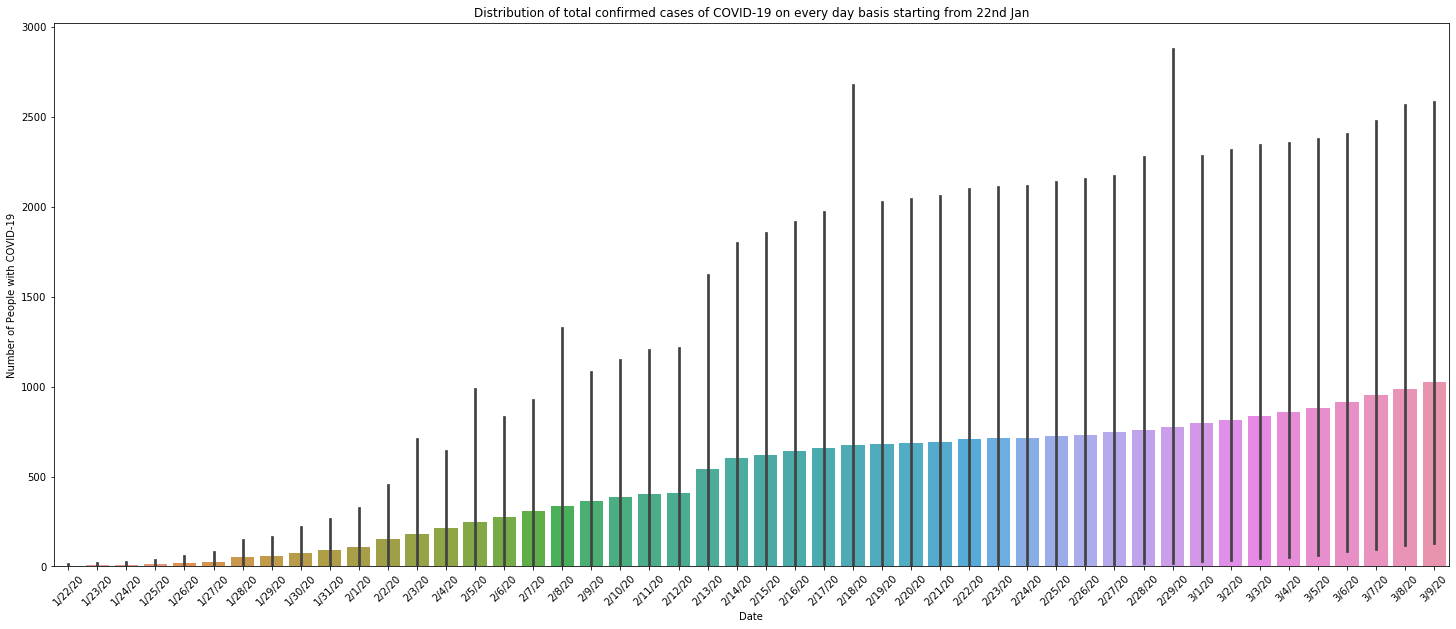

In [47]:


fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)

sns.barplot(  data = confirmed_cases_per_day)
ax.set_xticklabels( confirmed_cases_per_day, rotation = 45  )
plt.xlabel("Date")
plt.ylabel("Number of People with COVID-19")
plt.title('Distribution of total confirmed cases of COVID-19 on every day basis starting from 22nd Jan')

Text(0.5, 1.0, 'Number of Confirmed cases per country')

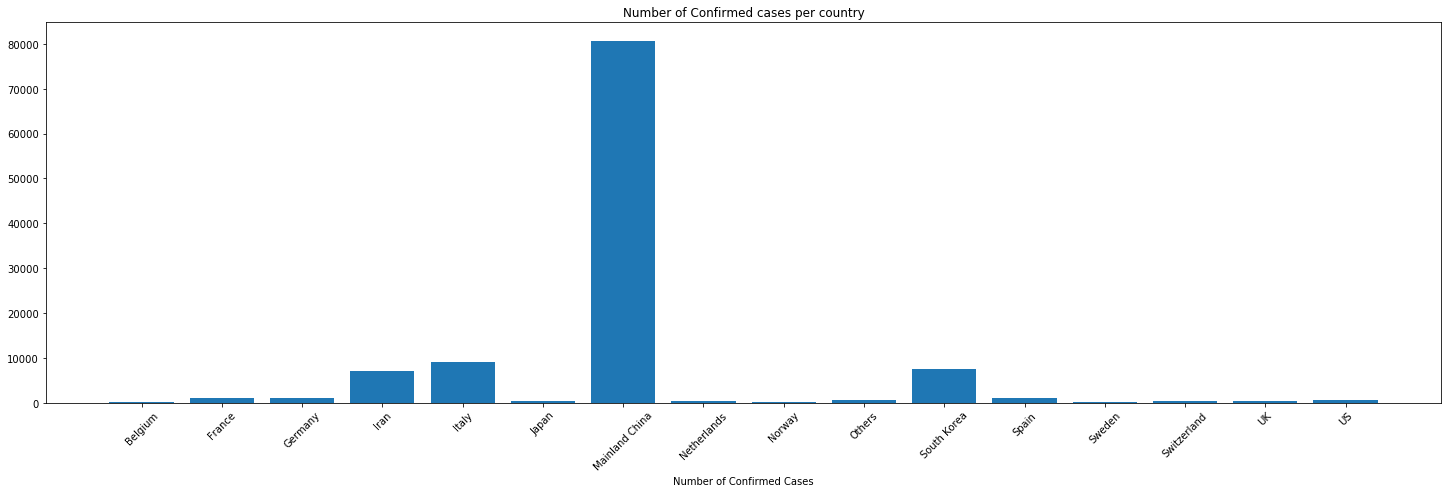

In [61]:
# let's check the impact of the virus by country
# let's check the impact of the virus by country
conf_cases = data_conf.groupby(data_conf.index).sum()
conf_cases_per_country = conf_cases.iloc[:,-1]

# let's look at countries with more than 100 cases, only
conf_cases_per_country = conf_cases_per_country[ conf_cases_per_country > 200 ]

x = conf_cases_per_country.index.tolist()
y = conf_cases_per_country.tolist()

fig = plt.figure(figsize=(25,7))
ax = plt.axes()

plt.bar(x, y)
ax.set_xticklabels( x , rotation=45 )
plt.xlabel("Date")
plt.xlabel("Number of Confirmed Cases")
plt.title('Number of Confirmed cases per country')

In [63]:
china = data_conf.loc["Mainland China"]
china

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,31.82570,117.2264,1,9,15,39,60,70,106,...,990,990,990,990,990,990,990,990,990,990
Mainland China,Beijing,40.18240,116.4142,14,22,36,41,68,80,91,...,411,413,414,414,418,418,422,426,428,428
Mainland China,Chongqing,30.05720,107.8740,6,9,27,57,75,110,132,...,576,576,576,576,576,576,576,576,576,576
Mainland China,Fujian,26.07890,117.9874,1,5,10,18,35,59,80,...,296,296,296,296,296,296,296,296,296,296
Mainland China,Gansu,36.06110,103.8343,0,2,2,4,7,14,19,...,91,91,91,91,91,102,119,120,124,124
Mainland China,Guangdong,23.34170,113.4244,26,32,53,78,111,151,207,...,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352
Mainland China,Guangxi,23.82980,108.7881,2,5,23,23,36,46,51,...,252,252,252,252,252,252,252,252,252,252
Mainland China,Guizhou,26.81540,106.8748,1,3,3,4,5,7,9,...,146,146,146,146,146,146,146,146,146,146
Mainland China,Hainan,19.19590,109.7453,4,5,8,19,22,33,40,...,168,168,168,168,168,168,168,168,168,168


In [95]:
china = data_conf.drop(["Province/State", "Lat", "Long"], axis=1)
china = china.loc[["Mainland China", "Italy"]]
china = china.groupby(china.index).mean()

In [96]:
china

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1128.000000,1694.000000,2036.000000,2502.000000,3089.000000,3858.000000,4636.000000,5883.000000,7375.000000,9172.000000
Mainland China,17.645161,20.612903,29.548387,45.129032,66.516129,92.354839,177.225806,195.806452,262.064516,315.580645,...,2556.483871,2575.032258,2581.483871,2585.516129,2589.387097,2594.258065,2599.129032,2601.677419,2603.193548,2604.354839


In [89]:
x = china.columns.tolist()
x

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20']

In [90]:
 y = china.loc["Mainland China"]
y

1/22/20      547
1/23/20      639
1/24/20      916
1/25/20     1399
1/26/20     2062
1/27/20     2863
1/28/20     5494
1/29/20     6070
1/30/20     8124
1/31/20     9783
2/1/20     11871
2/2/20     16607
2/3/20     19693
2/4/20     23680
2/5/20     27409
2/6/20     30553
2/7/20     34075
2/8/20     36778
2/9/20     39790
2/10/20    42306
2/11/20    44327
2/12/20    44699
2/13/20    59832
2/14/20    66292
2/15/20    68347
2/16/20    70446
2/17/20    72364
2/18/20    74139
2/19/20    74546
2/20/20    74999
2/21/20    75472
2/22/20    76922
2/23/20    76938
2/24/20    77152
2/25/20    77660
2/26/20    78065
2/27/20    78498
2/28/20    78824
2/29/20    79251
3/1/20     79826
3/2/20     80026
3/3/20     80151
3/4/20     80271
3/5/20     80422
3/6/20     80573
3/7/20     80652
3/8/20     80699
3/9/20     80735
Name: Mainland China, dtype: int64

Text(0.5, 1.0, 'Number of Confirmed cases per country')

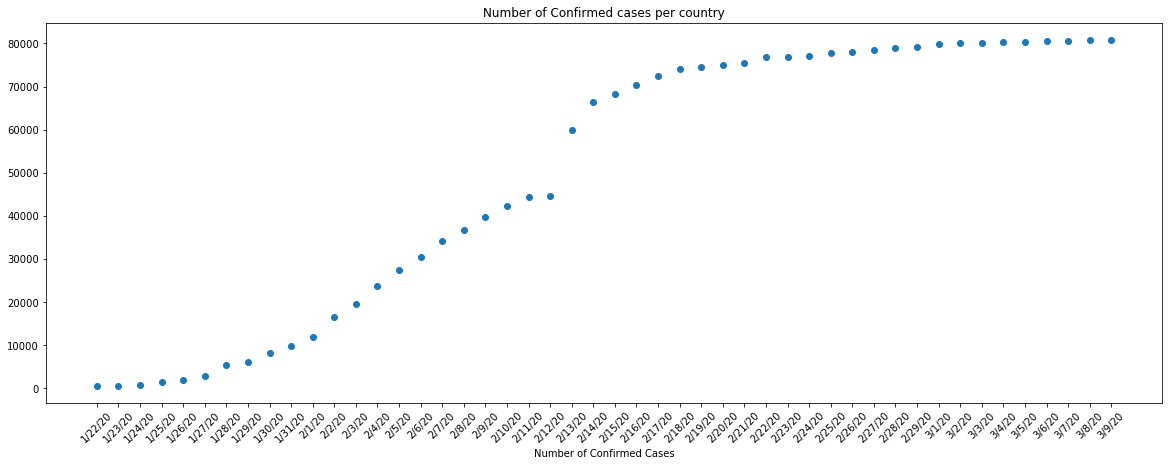

In [92]:
fig = plt.figure(figsize=(20,7))
ax = plt.axes()

subPlot1 = plt.scatter(x,y)

ax.set_xticklabels( x , rotation=45 )
plt.xlabel("Date")
plt.xlabel("Number of Confirmed Cases")
plt.title('Number of Confirmed cases per country')